<a href="https://colab.research.google.com/github/Berryl-Otieno22/Berryl-Otieno22/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load your uploaded file
df = pd.read_csv("liqour-sales june - Sheet1.csv")

# Preview the data
df.head()
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             20 non-null     object 
 1   sales person     20 non-null     object 
 2   beer sales       20 non-null     object 
 3   keg sales        20 non-null     int64  
 4   police expences  20 non-null     int64  
 5   total expences   20 non-null     int64  
 6   daily bill       19 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.2+ KB


,keg sales,police expences,total expences,daily bill
count,20.00000,20.000000,20.000000,19.000000
mean,6822.75000,400.000000,2340.500000,888.421053
std,3164.49941,190.567021,981.531966,874.555526
min,2100.00000,100.000000,620.000000,140.000000
25%,4046.25000,250.000000,1625.000000,355.000000
50%,7230.00000,350.000000,2240.000000,600.000000
75%,7691.25000,550.000000,3182.500000,1025.000000
max,13605.00000,750.000000,4510.000000,3100.000000


In [ ]:
# Simplify multi-day entries to just the first day
df['date'] = df['date'].str.split('/').str[0]

# Convert to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if all converted now
print(df['date'])
print("Unparsed dates:", df['date'].isnull().sum())

0    2025-06-01
1    2025-06-03
2    2025-06-07
3    2025-06-09
4    2025-06-11
5    2025-06-13
6    2025-06-14
7    2025-06-16
8    2025-06-17
9    2025-06-18
10   2025-06-19
11   2025-06-20
12   2025-06-21
13   2025-06-22
14   2025-06-23
15   2025-06-25
16   2025-06-26
17   2025-06-27
18   2025-06-29
19   2025-06-30
Name: date, dtype: datetime64[ns]
Unparsed dates: 0


In [ ]:
df['daily bill'] = df['daily bill'].fillna(0)
total_beer = df['beer sales'].sum()
total_keg = df['keg sales'].sum()
avg_beer = df['beer sales'].mean()
avg_keg = df['keg sales'].mean()

print(f"Total Beer Sales: {total_beer}")
print(f"Total Keg Sales: {total_keg}")
print(f"Average Beer Sales: {avg_beer:.2f}")
print(f"Average Keg Sales: {avg_keg:.2f}")

Total Beer Sales: 452844.0
Total Keg Sales: 136455
Average Beer Sales: 22642.20
Average Keg Sales: 6822.75


In [ ]:
total_police = df['police expences'].sum()
avg_police = df['police expences'].mean()

total_bill = df['daily bill'].sum()
avg_bill = df['daily bill'].mean()

print(f"Total Police Expenses: {total_police}")
print(f"Average Police Expenses: {avg_police:.2f}")
print(f"Total Daily Bills: {total_bill}")
print(f"Average Daily Bill: {avg_bill:.2f}")

Total Police Expenses: 8000
Average Police Expenses: 400.00
Total Daily Bills: 16880.0
Average Daily Bill: 844.00


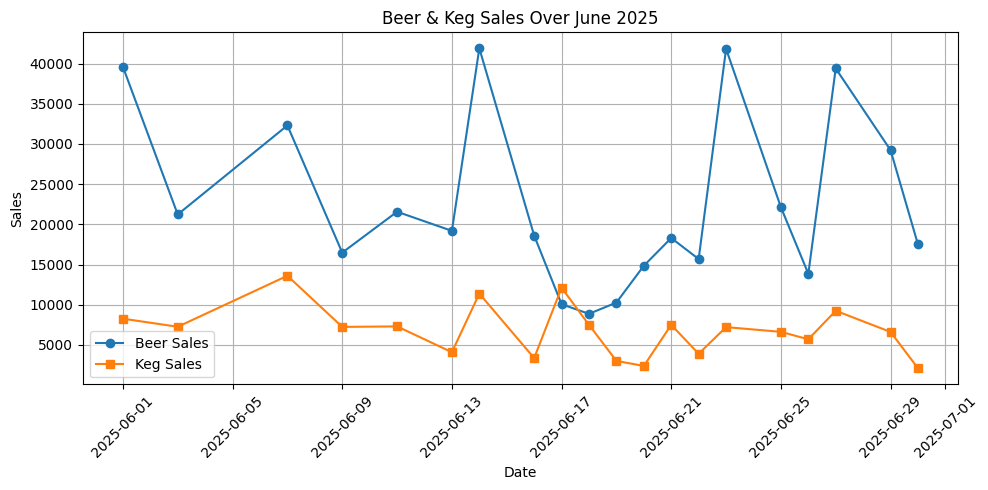

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['date'], df['beer sales'], label='Beer Sales', marker='o')
plt.plot(df['date'], df['keg sales'], label='Keg Sales', marker='s')
plt.title('Beer & Keg Sales Over June 2025')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Create a new column for total sales (beer + keg)
df['total sales'] = df['beer sales'] + df['keg sales']

# Find the row with the highest total sales
highest_sales_day = up sales'].idxmax()]

print("📈 Highest Sales Day:")
print(highest_sales_day[['date', 'sales person', 'beer sales', 'keg sales', 'total sales']])

📈 Highest Sales Day:
date            2025-06-14 00:00:00
sales person                   ruth
beer sales                  41895.0
keg sales                     11385
total sales                 53280.0
Name: 6, dtype: object


In [ ]:
# Top 5 days with highest police expenses
print("🚓 Top 5 Days with Highest Police Expenses:")
print(df.sort_values(by='police expences', ascending=False)[['date', 'sales person', 'police expences']].head(5))

# Top 5 days with highest daily bills
print("\n💸 Top 5 Days with Highest Daily Bills:")
print(df.sort_values(by='daily bill', ascending=False)[['date', 'sales person', 'daily bill']].head(5))

🚓 Top 5 Days with Highest Police Expenses:
         date sales person  police expences
17 2025-06-27         ruth              750
1  2025-06-03         ruth              650
5  2025-06-13         ruth              600
0  2025-06-01      maurice              550
3  2025-06-09      maurice              550

💸 Top 5 Days with Highest Daily Bills:
         date sales person  daily bill
18 2025-06-29      delvine      3100.0
1  2025-06-03         ruth      2810.0
17 2025-06-27         ruth      2200.0
11 2025-06-20         ruth      1250.0
0  2025-06-01      maurice      1050.0


In [ ]:
# Make sure we have a total sales column
df['total sales'] = df['beer sales'] + df['keg sales']

# Group by salesperson and sum their monthly totals
monthly_sales = df.groupby('sales person')[['beer sales', 'keg sales', 'total sales']].sum()

# Optional: sort by total sales descending
monthly_sales = monthly_sales.sort_values(by='total sales', ascending=False)

print("🧾 Monthly Sales Totals by Salesperson:")
print(monthly_sales)

🧾 Monthly Sales Totals by Salesperson:
              beer sales  keg sales  total sales
sales person                                    
ruth            261139.0      68885     330024.0
delvine         135620.0      52060     187680.0
maurice          56085.0      15510      71595.0


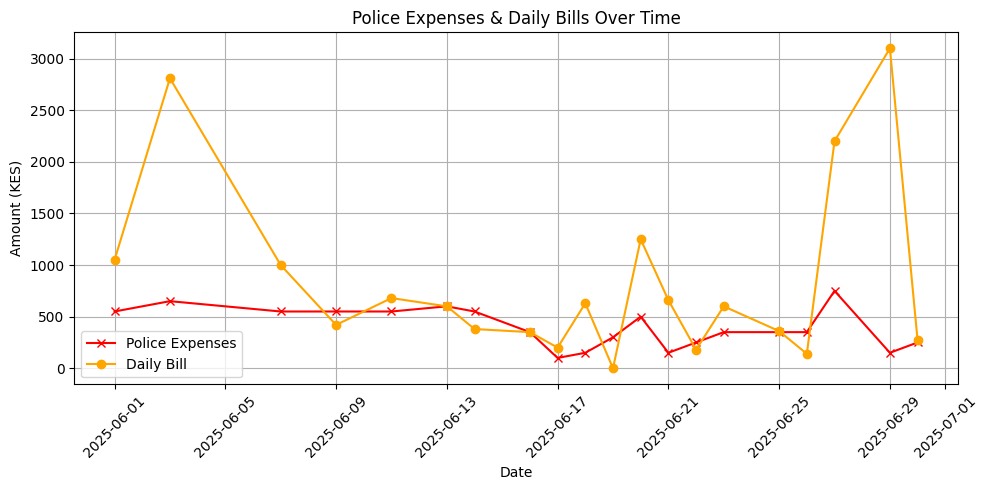

In [ ]:
# Police and Bill expenses over time
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['police expences'], label='Police Expenses', marker='x', color='red')
plt.plot(df['date'], df['daily bill'], label='Daily Bill', marker='o', color='orange')
plt.title('Police Expenses & Daily Bills Over Time')
plt.xlabel('Date')
plt.ylabel('Amount (KES)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Add a column showing percent contribution to total sales
monthly_sales['% contribution'] = (monthly_sales['total sales'] / monthly_sales['total sales'].sum()) * 100

print(monthly_sales)

              beer sales  keg sales  total sales  % contribution
sales person                                                    
ruth            261139.0      68885     330024.0       56.002810
delvine         135620.0      52060     187680.0       31.848009
maurice          56085.0      15510      71595.0       12.149181
